In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from pathlib import Path
from scipy import stats

In [5]:
data_path = Path("../Titanic_data/train.csv")
df = pd.read_csv(data_path)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

The age and Cabine variables contain a large amount of missing data, we will therefore exclude them when constructing our model.

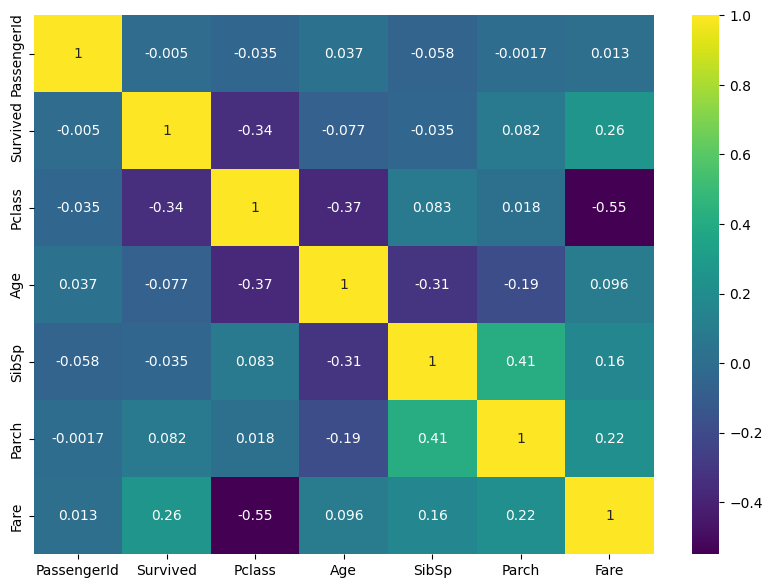

In [11]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

Pclass and Fare seem to be mildly correlated.
The same goes for SibSp and Parch.

<Figure size 1000x400 with 0 Axes>

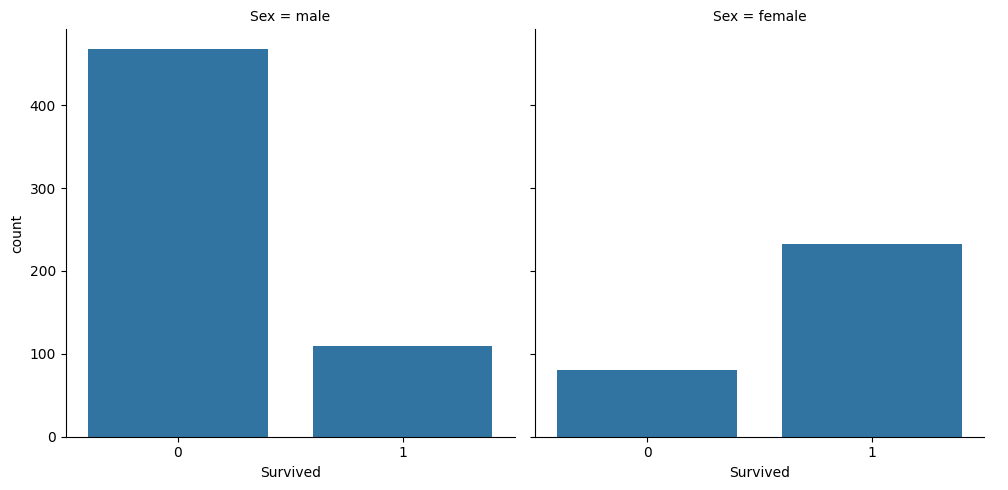

In [19]:
plt.figure(figsize=(10, 4))
sns.catplot(data=df, x='Survived', kind='count', col='Sex')
plt.show()

Is there a significant difference in the survival rate according to gender ? 

In [22]:
male_survivors = df[df.Sex == 'male']['Survived']
female_survivors = df[df.Sex == 'female']['Survived']

t_stat, p_val = stats.ttest_ind(female_survivors, male_survivors, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print('There is a significant difference in the survival rate between the two sexes')

else:
    print('We fail to reject the null hypothesis as there is insufficient evidence to conclude that the survival rates are different')

T-statistic: 18.67183317725917
P-value: 2.2836009226010533e-61
There is a significant difference in the survival rate between the two sexes


<Figure size 1000x400 with 0 Axes>

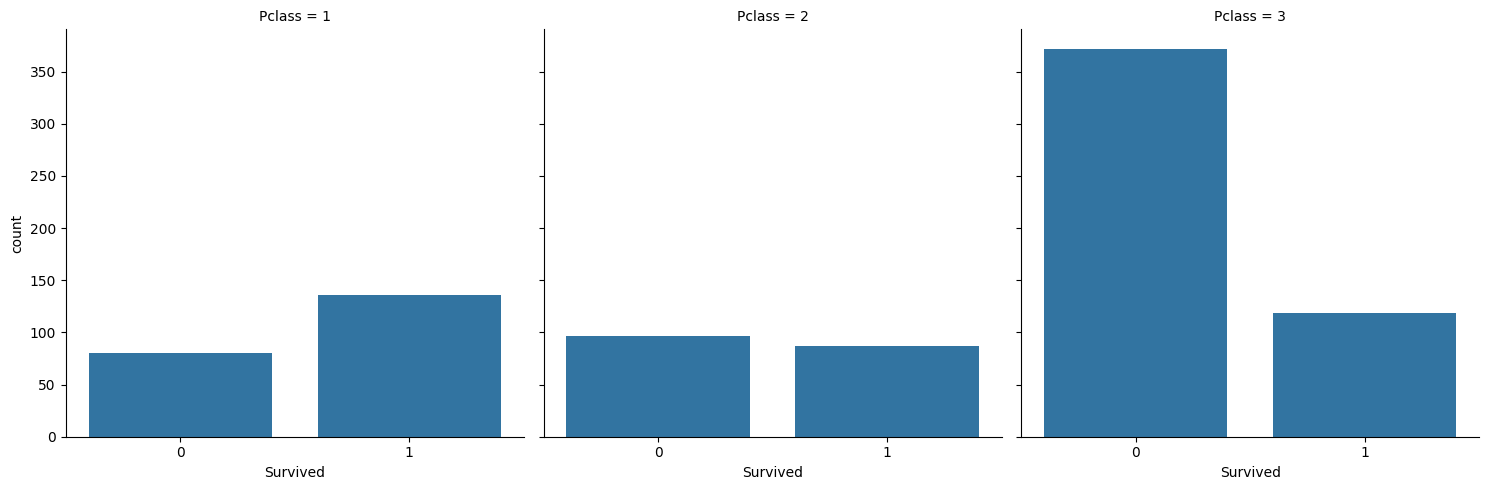

In [18]:
plt.figure(figsize = (10, 4))
sns.catplot(data=df, x='Survived', kind='count', col='Pclass')
plt.show()